# F1-F2 plots with R
In this tutorial, we load a table containing F1 and F2 values at vowel midpoint from vowels spoken by male speakers of Standard Southern British English.
It's good practice to have an advanced text editor installed on your PC. Notepad++ (https://notepad-plus-plus.org/downloads/) is a good option. Among other things it allows you to check (and change) character encoding, end-of-line character, delimiter (tab, comma, etc.). 

In [2]:
#load the table and displays first 6 lines
phonData = read.table('data3SseUTF8.txt', header = T, encoding = 'UTF-8')
head(phonData)

spk,inter,symbolASCII,symbolUTF8,F1,F2,F3
mjcSse,2,i-#f,i<U+02D0>,282.756,2485.008,3083.889
mjcSse,4,-ic,<U+026A>,464.152,2077.771,2687.396
mjcSse,6,e,e,688.513,1865.774,2645.545
mjcSse,8,-ae,æ,901.896,1549.408,2646.618
mjcSse,10,-as-#f,<U+0251><U+02D0>,760.724,1198.293,2745.529
mjcSse,12,-vt,<U+028C>,749.623,1464.558,2600.163


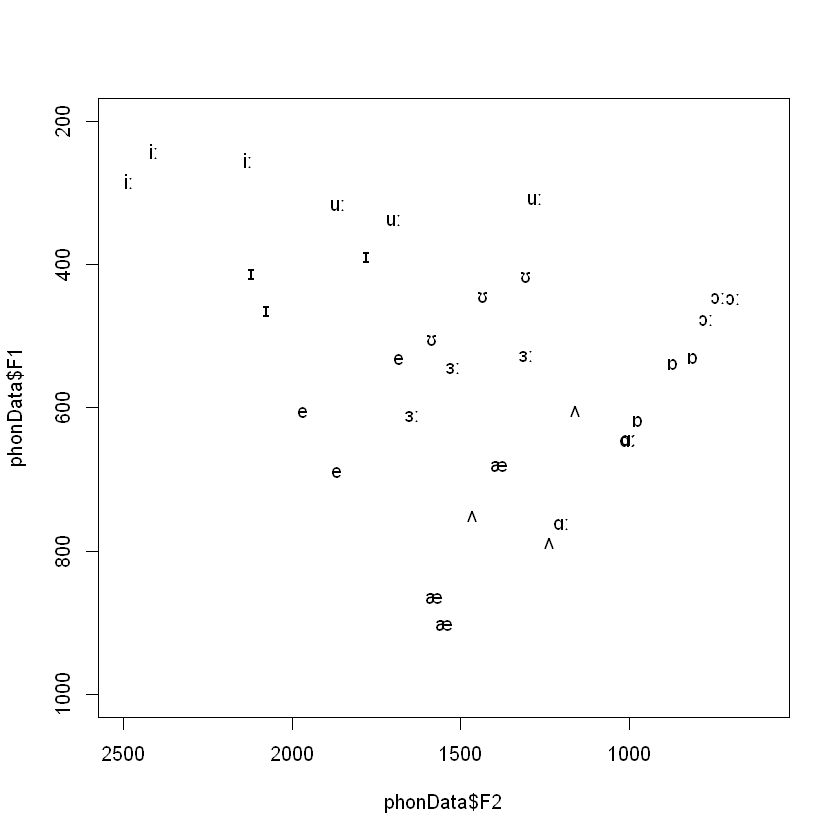

In [2]:
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200))
text(phonData$F2, phonData$F1, phonData$symbolUTF8)

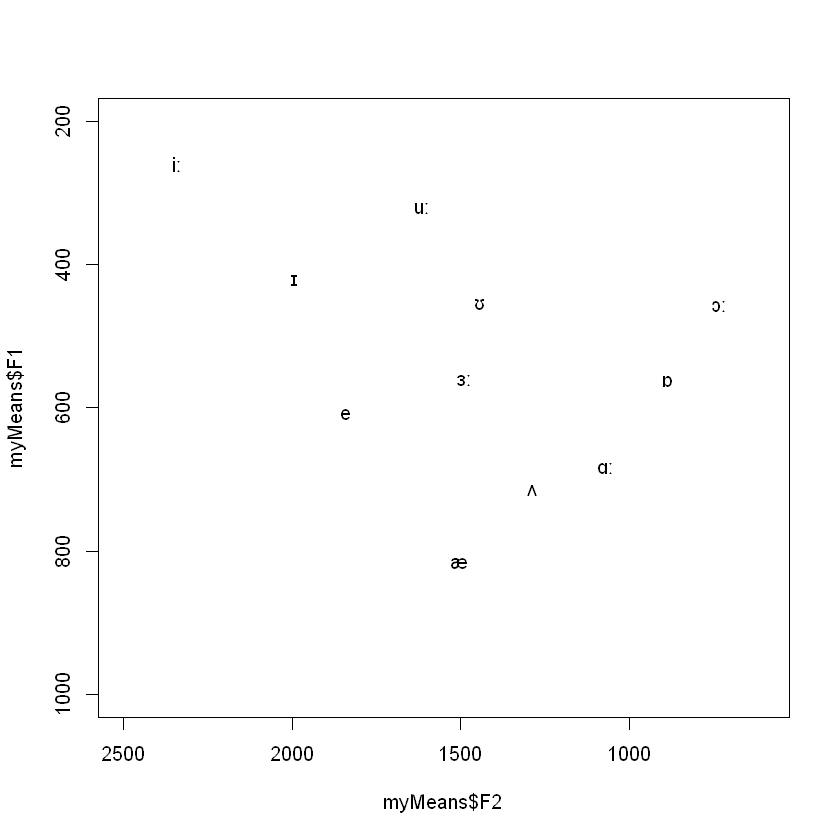

In [3]:
#Let's plot vowel means
myMeans = aggregate(cbind(phonData$F1,phonData$F2),list(phonData$symbolUTF8),mean)
colnames(myMeans) = c("Vowel", "F1", "F2")
plot(myMeans$F2, myMeans$F1, type="n", xlim=c(2500,600), ylim=c(1000,200))
text(myMeans$F2, myMeans$F1,myMeans$Vowel)
#

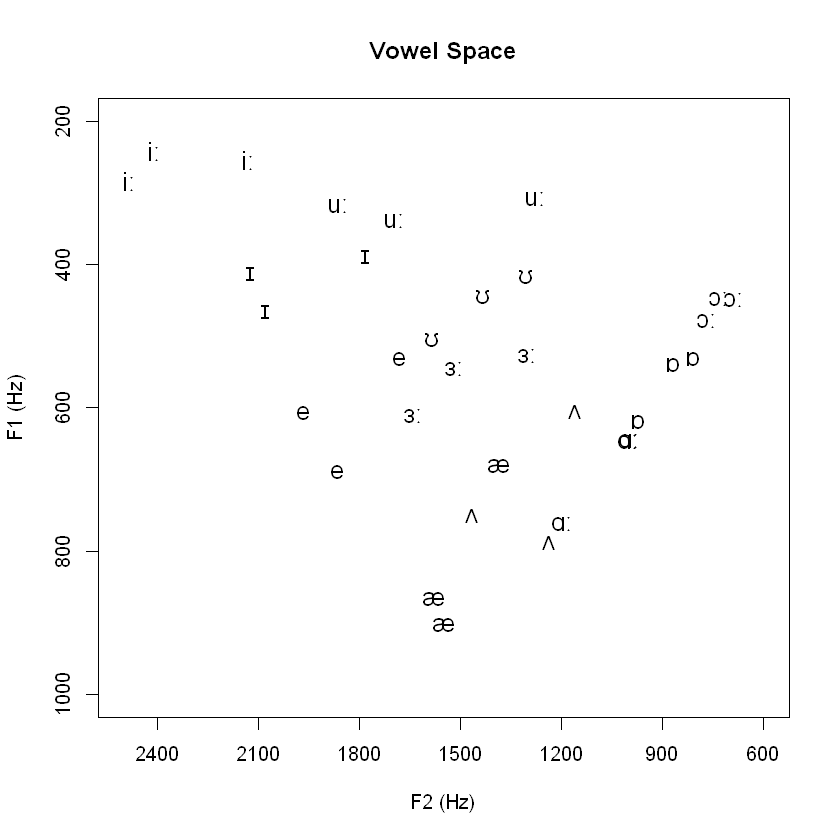

In [8]:
#now we want a title, better tick spacing, and better axis labels, bigger font size...
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), xlab = "F2 (Hz)", ylab = "F1 (Hz)", 
     main = "Vowel Space", xaxt="n", yaxt = "n")
axis(side=1,seq(from = 600, to = 2500, by = 300))
axis(side=2,seq(from = 200, to = 1000, by = 200))
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)
#note aspect ratio setting (asp) overrides xlim and ylim

In [ ]:
#playing with y/x ratio: here n Hz have the same size on screen in both axes
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), asp = 1)
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)

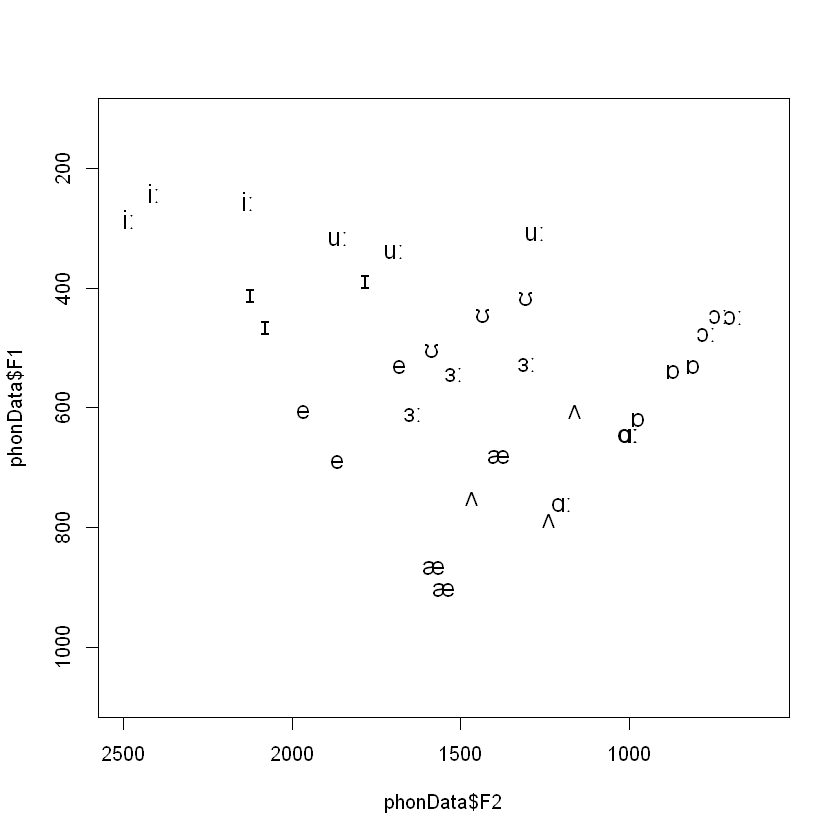

In [9]:
#next one is closer to the traditional plot
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), asp = 16/9)
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)

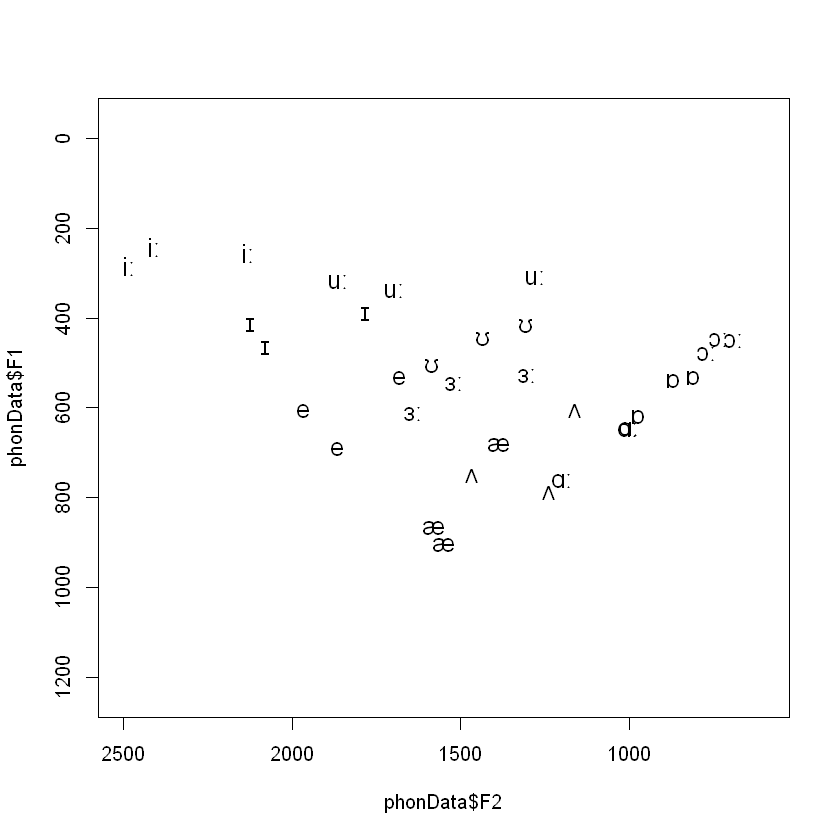

In [8]:
#if asp is smaller than 1, it gives more weight to F1
#pre-2000 TV ratio:
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), asp = 4/3)
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)

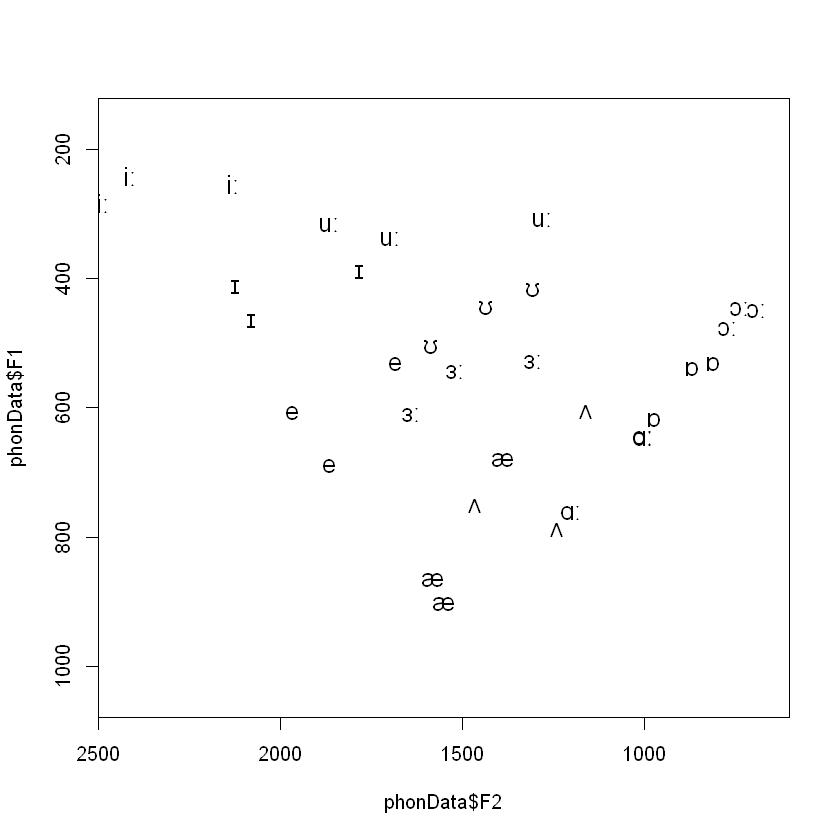

In [11]:
#ok let's stick to the 16/9 format and control axis limits exactly
plot(phonData$F2, phonData$F1, type="n", xlim=c(2500,600), ylim=c(1000,200), asp = 16/9, xaxs = 'i', yaxs = 'i')
text(phonData$F2, phonData$F1, phonData$symbolUTF8, cex = 1.3)